In [94]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
import xlsxwriter
from sklearn.decomposition import FactorAnalysis
from sklearn.preprocessing import StandardScaler

warnings.filterwarnings('ignore')

# 한글 폰트 설정 (운영체제에 맞게)
plt.rcParams['font.family'] = 'AppleGothic'   # Mac
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 깨짐 방지

# 상관분석

In [95]:
ts_data = pd.read_csv('./data/ts_data.csv', dtype={'거래소코드': str})
ts_data

,회사명,주식코드,연도,부가가치(IFRS)(백만원),종업원1인당 부가가치(IFRS)(백만원),종업원1인당 매출액(IFRS)(백만원),종업원1인당 정상영업이익(IFRS)(백만원),종업원1인당 순이익(IFRS)(백만원),종업원1인당 인건비(IFRS)(백만원),자본집약도(IFRS),...,타인자본구성비율(IFRS),부채비율(IFRS),차입금의존도(IFRS),차입금비율(IFRS),유보액대비율(IFRS),CASH FLOW 대 총자본비율(IFRS),총자본회전률(IFRS),자기자본회전률(IFRS),자본금회전률(IFRS),타인자본회전률(IFRS)
0,(주)우리은행,30,2015,3359021.00,3359021.00,1136.77,68.79,58.96,103.55,17449.65,...,93.17,1364.20,13.02,190.69,5.62,0.44,0.07,0.98,5.33,0.07
1,(주)우리은행,30,2016,3703886.00,3703886.00,1352.78,81.79,68.60,121.21,0.00,...,93.17,1364.66,11.77,172.41,5.68,1.02,0.07,1.08,6.21,0.08
2,(주)우리은행,30,2017,4174055.00,4174055.00,1452.13,123.85,88.26,141.68,0.00,...,93.33,1399.12,11.92,178.69,5.54,0.70,0.07,1.06,6.21,0.08
3,(주)경방,50,2015,107949.86,175.53,500.40,62.81,35.13,34.52,2047.99,...,46.66,87.49,24.32,45.60,52.25,2.92,0.24,0.47,22.45,0.51
4,(주)경방,50,2016,109992.25,191.62,546.82,74.18,53.97,36.43,0.00,...,44.20,79.22,20.32,36.42,54.69,4.28,0.25,0.46,22.90,0.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2754,(주)에코프로머티리얼즈,450080,2024,23740.80,36.47,460.59,-99.42,-65.57,71.22,0.00,...,42.83,74.92,34.03,59.52,54.42,-0.71,0.25,0.39,8.49,0.70
2755,두산로보틱스(주),454910,2023,5659.65,29.02,282.32,-86.90,-69.75,91.07,0.00,...,3.86,4.01,0.88,0.92,89.09,-4.86,0.21,0.23,1.94,2.94
2756,두산로보틱스(주),454910,2024,-17011.80,-72.70,220.39,-156.91,-132.59,89.22,0.00,...,4.06,4.24,0.39,0.40,88.36,-7.30,0.12,0.12,1.59,2.93
2757,오씨아이(주),456040,2024,358385.65,222.60,1235.85,75.11,54.98,121.61,0.00,...,47.32,89.81,29.84,56.64,50.54,7.07,0.95,1.81,44.45,2.01


In [96]:
ts_data = ts_data.iloc[:,3:]

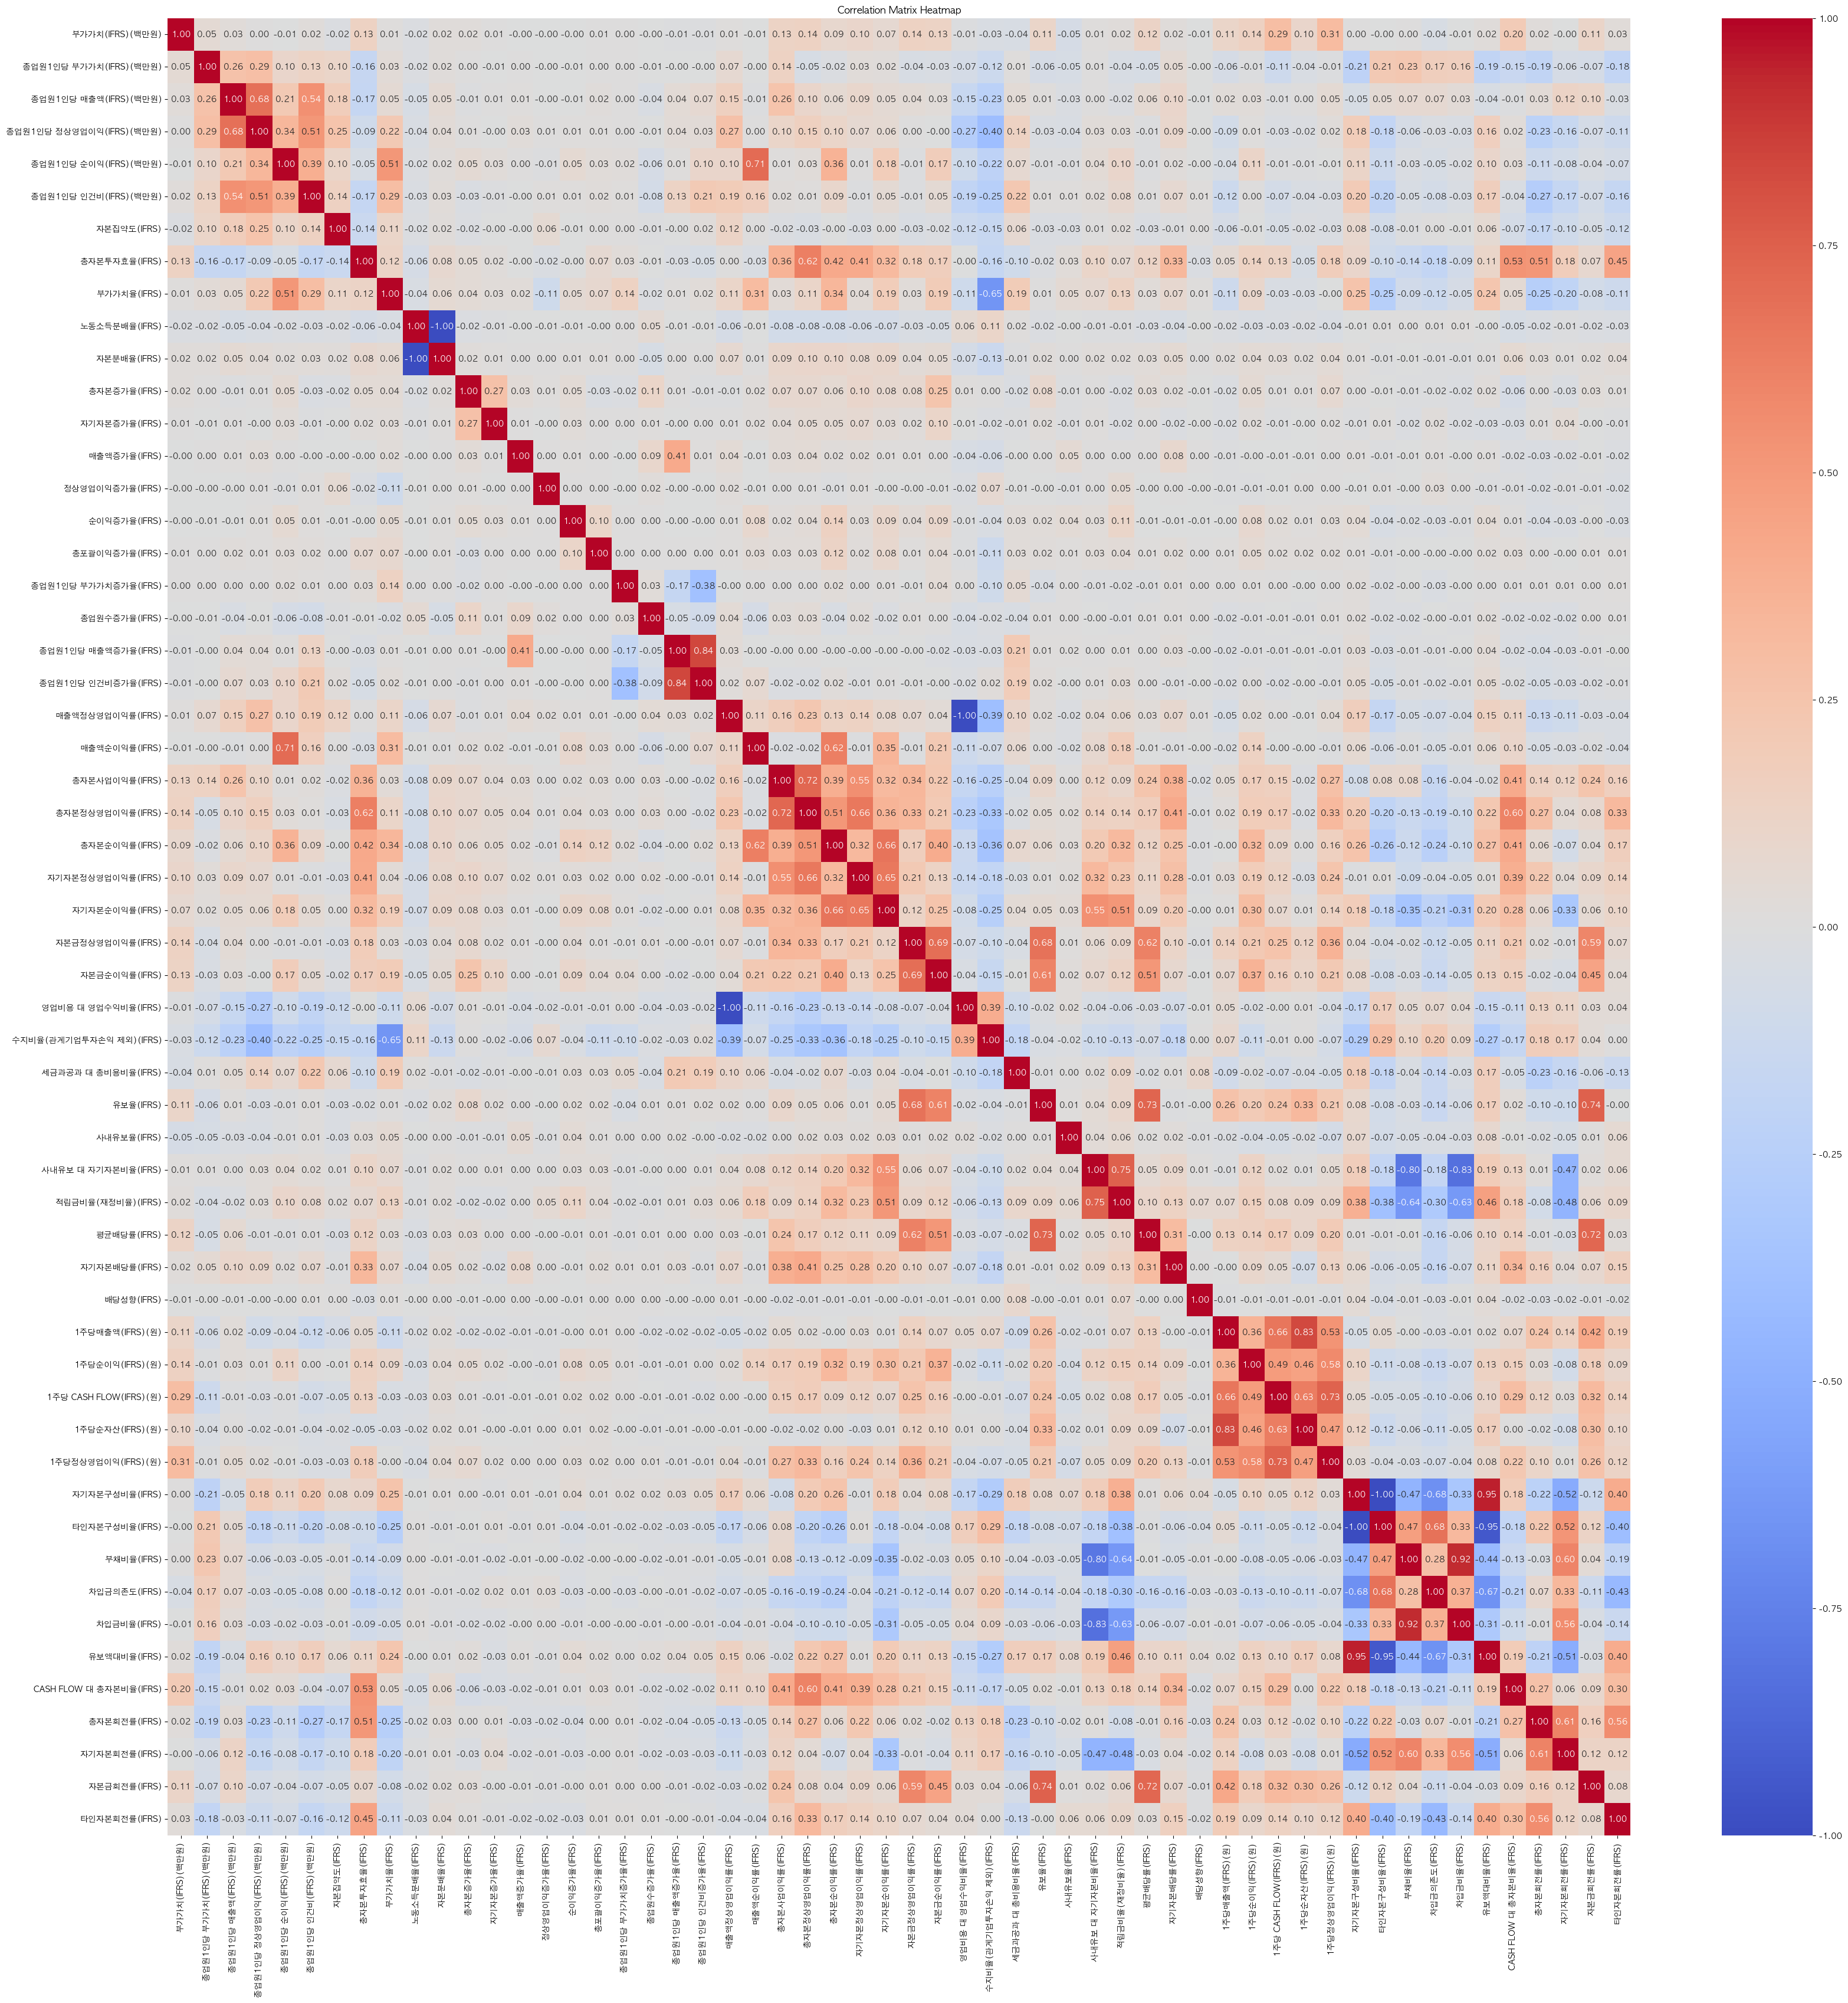

In [97]:
# 상관계수 행렬 계산
corr = ts_data.corr()

# 히트맵 그리기
plt.figure(figsize=(40, 40))
sns.heatmap(corr, cmap='coolwarm', vmin=-1, vmax=1, center=0, annot=True, fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [98]:
# 상관계수 행렬 계산
corr = ts_data.corr()

# 각 컬럼별로, 자기 자신을 제외한 나머지 컬럼들과의 상관계수 절대값이 모두 0.5 미만인지 확인
cols_to_drop = []
for col in corr.columns:
    # 자기 자신 제외 (상관계수 1)
    other_corrs = corr[col].drop(col)
    if all(other_corrs.abs() < 0.5):
        cols_to_drop.append(col)

# 해당 컬럼 삭제
filtered_data = ts_data.drop(columns=cols_to_drop)
filtered_data

,종업원1인당 매출액(IFRS)(백만원),종업원1인당 정상영업이익(IFRS)(백만원),종업원1인당 순이익(IFRS)(백만원),종업원1인당 인건비(IFRS)(백만원),총자본투자효율(IFRS),부가가치율(IFRS),노동소득분배율(IFRS),자본분배율(IFRS),종업원1인당 매출액증가율(IFRS),종업원1인당 인건비증가율(IFRS),...,타인자본구성비율(IFRS),부채비율(IFRS),차입금의존도(IFRS),차입금비율(IFRS),유보액대비율(IFRS),CASH FLOW 대 총자본비율(IFRS),총자본회전률(IFRS),자기자본회전률(IFRS),자본금회전률(IFRS),타인자본회전률(IFRS)
0,1136.77,68.79,58.96,103.55,1.21,18.64,48.86,51.14,11.01,3.35,...,93.17,1364.20,13.02,190.69,5.62,0.44,0.07,0.98,5.33,0.07
1,1352.78,81.79,68.60,121.21,1.27,17.63,50.83,49.17,19.00,17.05,...,93.17,1364.66,11.77,172.41,5.68,1.02,0.07,1.08,6.21,0.08
2,1452.13,123.85,88.26,141.68,1.41,19.88,49.07,50.93,7.34,16.89,...,93.33,1399.12,11.92,178.69,5.54,0.70,0.07,1.06,6.21,0.08
3,500.40,62.81,35.13,34.52,8.57,35.08,19.66,80.34,32.22,7.68,...,46.66,87.49,24.32,45.60,52.25,2.92,0.24,0.47,22.45,0.51
4,546.82,74.18,53.97,36.43,8.89,35.04,19.01,80.99,9.28,5.54,...,44.20,79.22,20.32,36.42,54.69,4.28,0.25,0.46,22.90,0.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2754,460.59,-99.42,-65.57,71.22,1.84,7.92,195.29,-95.29,-73.07,18.83,...,42.83,74.92,34.03,59.52,54.42,-0.71,0.25,0.39,8.49,0.70
2755,282.32,-86.90,-69.75,91.07,1.23,10.28,313.79,-213.79,0.00,0.00,...,3.86,4.01,0.88,0.92,89.09,-4.86,0.21,0.23,1.94,2.94
2756,220.39,-156.91,-132.59,89.22,-3.98,-32.99,0.00,0.00,-21.94,-2.03,...,4.06,4.24,0.39,0.40,88.36,-7.30,0.12,0.12,1.59,2.93
2757,1235.85,75.11,54.98,121.61,17.16,18.01,54.63,45.37,0.00,0.00,...,47.32,89.81,29.84,56.64,50.54,7.07,0.95,1.81,44.45,2.01


In [99]:
filtered_data.to_csv("./data/ts_cor_data.csv", index=False, encoding="utf-8-sig")

# 요인분석

In [100]:
cor_data = pd.read_csv("./data/ts_cor_data.csv")
cor_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2759 entries, 0 to 2758
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   종업원1인당 매출액(IFRS)(백만원)     2759 non-null   float64
 1   종업원1인당 정상영업이익(IFRS)(백만원)  2759 non-null   float64
 2   종업원1인당 순이익(IFRS)(백만원)     2759 non-null   float64
 3   종업원1인당 인건비(IFRS)(백만원)     2759 non-null   float64
 4   총자본투자효율(IFRS)             2759 non-null   float64
 5   부가가치율(IFRS)               2759 non-null   float64
 6   노동소득분배율(IFRS)             2759 non-null   float64
 7   자본분배율(IFRS)               2759 non-null   float64
 8   종업원1인당 매출액증가율(IFRS)       2759 non-null   float64
 9   종업원1인당 인건비증가율(IFRS)       2759 non-null   float64
 10  매출액정상영업이익률(IFRS)          2759 non-null   float64
 11  매출액순이익률(IFRS)             2759 non-null   float64
 12  총자본사업이익률(IFRS)            2759 non-null   float64
 13  총자본정상영업이익률(IFRS)          2759 non-null   float64
 14  총자본순이익률(

In [101]:
# 2. 수치형 변수만 선택 (요인분석은 수치형 변수만 가능)
numeric_cols = cor_data.select_dtypes(include=[np.number]).columns
X = cor_data[numeric_cols].dropna()
X = (X-np.mean(X,axis=0))/(np.std(X,axis=0))
# 3. 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. 요인분석 (예: 3개 요인)
fa = FactorAnalysis(n_components=5, rotation='varimax')
X_factors = fa.fit_transform(X_scaled)

factor_names = [f'Factor_{1+i}' for i in range(X_factors.shape[1])]
X_factors_df = pd.DataFrame(fa.components_.T, index = X.columns, columns=factor_names)

In [102]:
X_factors_df

,Factor_1,Factor_2,Factor_3,Factor_4,Factor_5
종업원1인당 매출액(IFRS)(백만원),0.055395,0.045079,0.036338,0.126275,-0.201230
종업원1인당 정상영업이익(IFRS)(백만원),-0.159131,-0.006644,-0.062611,0.323743,-0.215847
종업원1인당 순이익(IFRS)(백만원),-0.089650,-0.012202,-0.028134,0.270177,-0.230861
종업원1인당 인건비(IFRS)(백만원),-0.176823,-0.004922,-0.036583,0.375255,-0.117510
총자본투자효율(IFRS),-0.082603,-0.067155,0.033761,-0.498015,-0.546062
부가가치율(IFRS),-0.224140,-0.027775,-0.029762,0.345485,-0.277449
노동소득분배율(IFRS),0.002193,0.001100,-0.020444,-0.003338,0.124906
자본분배율(IFRS),-0.004468,-0.004106,0.021054,0.001259,-0.145103
종업원1인당 매출액증가율(IFRS),-0.032159,-0.000612,-0.003211,0.053076,-0.002531
종업원1인당 인건비증가율(IFRS),-0.046268,-0.002674,0.000972,0.071877,0.001685


In [103]:
with pd.ExcelWriter('./data/factor_loadings2.xlsx', engine='xlsxwriter') as writer:
    (X_factors_df.style
     .background_gradient(cmap='coolwarm', axis=1, vmin=-1, vmax=1)
     .to_excel(writer, sheet_name='Factor Loadings'))